# Problem Set 2

## Problem 1

Consider linear system

$$
\begin{align*}
2x_1 + x_2 = 1\\
x_1 + 2x_2 + x_3 = 2\\
x_2 + 2x_3 = 3
\end{align*}
$$

(a) Find the $LU$ factorization of the coefficient matrix $A$.   Show that $U = DL^T$ with $D$ diagonal and thus $A=LDL^T$. Find the exact solution using the $LU$ factorization.  

(b) Solve the system using Jacobi and Gauss-Seidel iterations. How many iterations are needed to reduce the relative error of the solution to $10^{-8}$?  

(c) Plot in semilog scales the relative errors by both methods as a function of the number of iterations.

(d) Explain the convergence rate. Which of the methods is better and why?



### Solution

Let us perform the $LU$ factorization by hand:


$$
\begin{align*}
\begin{bmatrix}
2 & 1 & 0\\
1 & 2 & 1\\
0 & 1 & 2
\end{bmatrix}
\Rightarrow (R_2 - \frac{1}{2}R_1)
\begin{bmatrix}
2 & 1 & 0\\
0 & \frac{3}{2} & 1\\
0 & 1 & 2
\end{bmatrix}
\Rightarrow (R_3 - \frac{2}{3}R_2)
\begin{bmatrix}
2 & 1 & 0\\
0 & \frac{3}{2} & 1\\
0 & 0 & \frac{4}{3}
\end{bmatrix}
= U;
\hspace{10mm}
L =
\begin{bmatrix}
1 & 0 & 0\\
\frac{1}{2} & 1 & 0\\
0 & \frac{2}{3} & 1
\end{bmatrix}
\end{align*}
$$

And check it via *numpy*:

In [1]:
import numpy as np
from fractions import Fraction
from scipy import linalg as lin
import sympy as sp
from sympy import abc

A = np.matrix([
    [2, 1, 0],
    [1, 2, 1],
    [0, 1, 2]
])

def bmatrix(a):
    """Returns a LaTeX bmatrix

    :a: numpy array
    :returns: LaTeX bmatrix as a string
    """
    if len(a.shape) > 2:
        raise ValueError('bmatrix can at most display two dimensions')
    lines = str(a).replace('[', '').replace(']', '').splitlines()
    rv = [r'\begin{bmatrix}']
    rv += ['  ' + ' & '.join(l.split()) + r'\\' for l in lines]
    rv +=  [r'\end{bmatrix}']
    return '\n'.join(rv)

E, L, U = lin.lu(A, permute_l = False)
L = np.matrix(L)
U = np.matrix(U)
print("L:")
print(L)
print("\nU:")
print(U)

L:
[[1.         0.         0.        ]
 [0.5        1.         0.        ]
 [0.         0.66666667 1.        ]]

U:
[[2.         1.         0.        ]
 [0.         1.5        1.        ]
 [0.         0.         1.33333333]]


Let us show, that $U = DL^T$:

$$
L^T = 
\begin{bmatrix}
1 & \frac{1}{2} & 0\\
0 & 1 & \frac{2}{3}\\
0 & 0 & 1
\end{bmatrix}
;\hspace{10mm}
D = 
\begin{bmatrix}
2 & 0 & 0\\
0 & \frac{3}{2} & 0\\
0 & 0 & 1
\end{bmatrix}
;\hspace{10mm}
U = DL^T
$$

That means, $A = LU = LDL^T$.

Now, let us solve the system using $LU$ factorization:

$$
Ax = b \hspace{3mm} \Rightarrow \hspace{3mm} LUx = b;
\\
\begin{align*}
\begin{cases}
Ux = y;\\
Ly = b
\end{cases}
\end{align*}
$$

$$
\begin{bmatrix}
  1 & 0 & 0\\
  \frac{1}{2} & 1 & 0\\
  0 & \frac{2}{3} & 1\\
\end{bmatrix}
\begin{bmatrix}
  y_1\\
  y_2\\
  y_3
\end{bmatrix}
=
\begin{bmatrix}
1\\
2\\
3
\end{bmatrix}
\Rightarrow
\begin{cases}
y_1 = 1\\
y_2 = \frac{3}{2}\\
y_3 = 2
\end{cases}
$$

$$
\begin{bmatrix}
2 & 1 & 0\\
0 & \frac{3}{2} & 1\\
0 & 0 & \frac{4}{3}
\end{bmatrix}
\begin{bmatrix}
x_1\\
x_2\\
x_3
\end{bmatrix}
=
\begin{bmatrix}
1\\
\frac{3}{2}\\
2
\end{bmatrix}
\Rightarrow
\begin{cases}
x_1 = \frac{1}{2}\\
x_2 = 0\\
x_3 = \frac{3}{2}
\end{cases}
$$

$$
x = 
\begin{bmatrix}
1/2\\
0\\
3/2
\end{bmatrix}
$$

Next we solve the system using Jacobi and Gauss-Seidel methods:

In [2]:
import matplotlib.pyplot as plt
import copy

In [3]:
D = np.matrix(np.diag(np.diag(A)))
U = np.matrix(np.triu(A-D))
L = np.matrix(np.tril(A-D))

x_exact = np.matrix([1/2, 0, 3/2]).T
tol = 1e-8
err = 1
x_init = np.matrix([1, 1, 1]).T #initial x
b = np.matrix([1, 2, 3]).T

def Jacobi(L, D, U, x_init, b, err, tol):

    x = copy.deepcopy(x_init)

    max_iters = 500

    err_iter = np.array([])
    err_exact_iter = np.array([])
    

    iters = 0
    while ((err > tol) and (iters <= max_iters)) :
        iters = iters + 1
        bb = b - (U + L)*x
        x_new = np.linalg.solve(D, bb)
        err = np.linalg.norm(x_new - x)/np.linalg.norm(x)
        err_exact = np.linalg.norm(x_new - x_exact)

        err_iter = np.append(err_iter, err)
        err_exact_iter = np.append(err_exact_iter, err_exact)

        x = x_new

    return err_iter, err_exact_iter, x_new, iters

def Gauss_Seidel(L, D, U, x_init, b, err, tol):

    x = copy.deepcopy(x_init)

    max_iters = 250

    err_iter = np.array([])
    err_exact_iter = np.array([])

    iters = 0
    while ((err > tol) and (iters <= max_iters)):
        iters = iters + 1

        bb = b - U*x
        x_new = np.linalg.solve(D+L, bb)
        err = np.linalg.norm(x_new - x)/np.linalg.norm(x)
        err_exact = np.linalg.norm(x_new - x_exact)

        err_iter = np.append(err_iter, err)
        err_exact_iter = np.append(err_exact_iter, err_exact)

        x = x_new

    return err_iter, err_exact_iter, x_new, iters

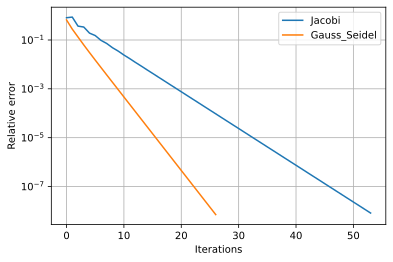

In [4]:
%config InlineBackend.figure_format='svg'

fig = plt.figure()
ax = plt.gca()

errs_j, ex_errs_j, x_j, i_j = Jacobi(L, D, U, x_init, b, err, tol)
plt.plot(errs_j)

errs_g, ex_errs_g, x_g, i_g = Gauss_Seidel(L, D, U, x_init, b, err, tol)
plt.plot(errs_g)

ax.set_yscale('log')


ax.legend(('Jacobi', 'Gauss_Seidel'))
ax.set_xlabel('Iterations')
ax.set_ylabel('Relative error')
ax.set_yticks([1e-7, 1e-5, 1e-3, 1e-1])
ax.tick_params(axis='y', which='minor')
ax.grid(which='both')

As we see, it took $26$ iterations for Gauss-Seidel method to reach the target tolerance of $10^{-8}$, while Jacobi method required $54$ iterations.

This can be explained by the following: in Gauss-Seidel, as soon as we acquire a new iteration of a vector $x$ component $x_i^{(k+1)}$, we instantly utilize this updated value in the computation of the following components: $x_i^{(k+1)} = f(x_1^{(k+1)}, ..., x_{i-1}^{(k+1)}, x_{i+1}^{(k)}, ..., x_n^{(k)})$. In Jacobi, we calculate the new vector $x^{k+1}$ relying solely on the result of the previous iteration: $x_i^{k+1} = f(x_j^{(k)}),\hspace{3mm}j \neq i$.

## Problem 2

Factor these two matrices $A$ into $S\Lambda S^{-1}$:

$$
A1 = 
\begin{bmatrix}
1 & 2\\
0 & 3
\end{bmatrix}
,\hspace{3mm}
A2 =
\begin{bmatrix}
1 & 2\\
0 & 3
\end{bmatrix}
$$

Using that factorization, find for both: (a) $A^3$; (b) $A^{-1}$.

### Solution

Firstly, we find the eigenvalues and eigenvectors:

$$
\begin{bmatrix}
1-\lambda & 2\\
0 & 3-\lambda
\end{bmatrix}
 = 0
$$

By performing simple calculations by hand, we obtain:

$$
h_1 = 
\begin{bmatrix}
1\\
0
\end{bmatrix}
,\hspace{3mm}
\lambda_1 = 1
\\
h_2 =
\frac{\sqrt{2}}{2}
\begin{bmatrix}
1\\
1
\end{bmatrix}
,\hspace{3mm}
\lambda_2 = 3
$$

```{Note}
We normalized the eigenvectors
```

Now let's perform a check with *numpy*:

In [5]:
A1 = np.matrix([
    [1, 2],
    [0, 3]
])

val1, vec1 = np.linalg.eig(A1)
print("E_values A1:")
print(val1)
print("E_vectors A1:")
print(vec1)

E_values A1:
[1. 3.]
E_vectors A1:
[[1.         0.70710678]
 [0.         0.70710678]]


As we have our vectors and values, we can construct $\Lambda$ and $S$, $S^{-1}$ matrices:

In [6]:
Lambda = np.matrix(np.diag(val1))
S = vec1
Si = np.linalg.inv(S)

print("S:")
print(S)
print("Lambda:")
print(Lambda)
print("S_inverse:")
print(Si)

S:
[[1.         0.70710678]
 [0.         0.70710678]]
Lambda:
[[1. 0.]
 [0. 3.]]
S_inverse:
[[ 1.         -1.        ]
 [ 0.          1.41421356]]


$$

S = 
\begin{bmatrix}
1 & \sqrt{2}/2\\
0 & \sqrt{2}/{2}
\end{bmatrix}
;\hspace{3mm}
\Lambda = 
\begin{bmatrix}
1 & 0\\
0 & 3
\end{bmatrix}
;\hspace{3mm}
S^{-1} = 
\begin{bmatrix}
1 & -1\\
0 & 2/\sqrt{2}
\end{bmatrix}
$$

From now, we can fing the $A^3$ powered matrix by simply multiplying the decomposition:

$$
A^3 = S\Lambda S^{-1} S \Lambda S^{-1} S \Lambda S^{-1} =
\\
\hspace{1mm}
\\
= S \Lambda^3 S^{-1}.
$$

And for $\Lambda$ it is easy to power because it is a diagonal matrix.

$$
\Lambda ^3 =
\begin{bmatrix}
1 & 0\\
0 & 9
\end{bmatrix}
,
\\
\hspace{1mm}
\\
S\Lambda ^3 S^{-1} = 
\begin{bmatrix}
1 & 8\\
0 & 9
\end{bmatrix}
$$

For inverse matrix:

$$
S\Lambda S^{-1} A_1^{-1} = E, \Rightarrow A_1^{-1} = S^{-1} \Lambda ^{-1} S
$$

We already have $S$ and $S^{-1}$, and for diagonal $\Lambda$ the inverse matrix contains the inverse diagonal elements of $\Lambda$:

$$
\Lambda ^{-1}= 
\begin{bmatrix}
1 & 0\\
0 & 1/3
\end{bmatrix}
$$

So we easily find $A_1^{-1}$:

$$
A_1^{-1} = 
\begin{bmatrix}
1 & \sqrt{2}{3}\\
0 & 1/3
\end{bmatrix}
$$

Now let's look at the second matrix $A_2$. Instantly we notice it is a rank-1 matrix, meaning, $A_2^{-1}$ matrix doesn't exist.

$$
h_1 = 
\begin{bmatrix}
1\\
-1
\end{bmatrix}
,\hspace{3mm}
\lambda_1 = 0
\\
\hspace{1mm}
\\
h_2 =
\begin{bmatrix}
1\\
3
\end{bmatrix}
,\hspace{3mm}
\lambda_2 = 4
$$

It's eigenvectors are non-collinear and form a basis in 2-dimensional space. Thus we can perform the factorization.

$$
S = 
\begin{bmatrix}
1 & 1\\
-1 & 3
\end{bmatrix}
;\hspace{3mm}
\Lambda = 
\begin{bmatrix}
0 & 0\\
0 & 4
\end{bmatrix}
;\hspace{3mm}
S^{-1} =  
\begin{bmatrix}
3/4 & -1/4\\
1/4 & 1/4
\end{bmatrix}
$$

For $A_2^3$:

$$
A_2^3 = 
\begin{bmatrix}
16 & 16\\
48 & 48
\end{bmatrix}
.
$$


## Problem 3

Given a system $Ax = b$ with

$$
A = 
\begin{bmatrix}
  1 & -1 & -3\\
  2 & 3 & 4\\
  -2 & 1 & 4\\
\end{bmatrix}
,\hspace{3mm}
b = 
\begin{bmatrix}
  3\\
  a\\
  -1\\
\end{bmatrix}
,
$$

for which $a$ there is a solution? Find the general solution of the system for that $a$.






### Solution

Let's check the matrix' rank:

In [ ]:
a = abc.symbols('a')

A = sp.Matrix([
    [1, -1, -3],
    [2, 3, 4],
    [-2, 1, 4]
])

b = sp.Matrix([
    3, a, -1]
)

print('Rank: {}'.format(A.rank()))
A.rref()[0]

Rank: 2


Matrix([
[1, 0, -1],
[0, 1,  2],
[0, 0,  0]])

This matrix is a rank-2 matrix. Let's find it's left nullspace, write down the solvability condition and find the appropriate $a$.
Starting with the left null-space:

In [ ]:
y = A.T.nullspace()[0]
y

Matrix([
[8/5],
[1/5],
[  1]])

We want to fulfill the following condition:

$$
y^Tb = 0
$$

In [ ]:
ans = sp.solve(y.T*b, a)
ans

{a: -19}

As we see, the system is solvable with $a = -19$. Let us perform some check:

In [ ]:
bs = b.subs(a, -19)
y.T*bs

Matrix([[0]])

Now as we have our vector $b$ with wich the system is solvable, we may find the general solution for the system:

In [ ]:
a, b, c = abc.symbols('a b c')
system = A, bs
sol = sp.linsolve((A, bs), a, b, c); sol

{(c - 2, -2*c - 5, c)}

With $c \in \mathbb{R}$ we get our solution:

$$
x =
\begin{bmatrix}
-2\\
-5\\
0
\end{bmatrix}
+
\begin{bmatrix}
1\\
-2\\
1
\end{bmatrix}
\cdot
c.
$$

## Problem 4
Consider the system of linear differential equations:

$$
\frac{du}{dt} = Au, \hspace{3mm} A = 
\begin{bmatrix}
  1 & -1 & 0\\
  -1 & 2 & -1\\
  0 & -1 & 1\\
\end{bmatrix}
.
$$

(a) Using the spectral factorization of A, determine the general solution of the system.  
(b) Find the behavior of the solution at large $t$ if the initial condition is $u(0) = \begin{bmatrix} 1 & -1 & 1 \end{bmatrix} ^T$

### Solution

Check the rank of the matrix:

In [ ]:
A = sp.Matrix([
    [1, -1, 0],
    [-1, 2, -1],
    [0, -1, 1]
])

A.rank()

2

Spectral decomposition:

In [ ]:
S, L = A.diagonalize()

In [ ]:
print("S:")
S

S:


Matrix([
[1, -1,  1],
[1,  0, -2],
[1,  1,  1]])

In [ ]:
print("Lambda:")
L

Lambda:


Matrix([
[0, 0, 0],
[0, 1, 0],
[0, 0, 3]])

In [ ]:
print("S^-1:")
S**-1

S^-1:


Matrix([
[ 1/3,  1/3, 1/3],
[-1/2,    0, 1/2],
[ 1/6, -1/3, 1/6]])

The general solution may be written as follows:

$$
\frac{du}{dt} = S\Lambda S^{-1}u\\
S^{-1}\frac{du}{dt} = \Lambda S^{-1}u \\
\frac{dv}{dt} = \Lambda v, \hspace{3mm} v = S^{-1}u \Rightarrow \\
\Rightarrow
v = e^{\Lambda t}v_0; \hspace{3mm} u = Se^{\Lambda t}S^{-1}u_0
$$

In [ ]:
x, y, z, t = abc.symbols('x, y, z, t')
x0, y0, z0 = abc.symbols('x0, y0, z0')
u = sp.Matrix([x, y, z])

v = S**-1*u

elambdat = (L*t).exp()

u0 = sp.Matrix([x0, y0, z0])

u_ans = S*elambdat*S**-1*u0; u_ans.simplify()
u_ans



Matrix([
[x0*(exp(3*t) + 3*exp(t) + 2)/6 + y0*(1 - exp(3*t))/3 + z0*(exp(3*t) - 3*exp(t) + 2)/6],
[                    x0*(1 - exp(3*t))/3 + y0*(2*exp(3*t) + 1)/3 + z0*(1 - exp(3*t))/3],
[x0*(exp(3*t) - 3*exp(t) + 2)/6 + y0*(1 - exp(3*t))/3 + z0*(exp(3*t) + 3*exp(t) + 2)/6]])

With $u_0 = \begin{bmatrix}1 & -1 & 1\end{bmatrix}$:

In [ ]:
u_ans_num = u_ans.subs({x0: 1, y0: -1, z0: 1})
u_ans_num

Matrix([
[2*exp(3*t)/3 + 1/3],
[1/3 - 4*exp(3*t)/3],
[2*exp(3*t)/3 + 1/3]])

We can decompose the solution into two vectors:

In [ ]:
vec_c = sp.Matrix([1/3, 1/3, 1/3])
u_e = u_ans_num - vec_c
u_e

Matrix([
[ 2*exp(3*t)/3],
[-4*exp(3*t)/3],
[ 2*exp(3*t)/3]])

$$
u =
\begin{bmatrix}
1/3\\
1/3\\
1/3
\end{bmatrix}
+
\frac{2}{3}
\begin{bmatrix}
1\\
-2\\
1
\end{bmatrix}
e^{3t}
$$

With large $t$, the solution will approach the $\begin{bmatrix}1 & -2 & 1\end{bmatrix}^T$ direction.

## Problem 5
For matrix $A = \begin{bmatrix} 2021 & 20 & 0\\ 20 & 2021 & 21\\ 0 & 21 & 2021\\ \end{bmatrix} $ and vector
$b = \begin{bmatrix}2\\1\\0\end{bmatrix}$,
what is the most likely direction of vector $x = A^{2021}b$?

### Solution

Diagonalization:

In [ ]:
A = sp.Matrix([
    [2021, 20, 0],
    [20, 2021, 21],
    [0, 21, 2021]
])

b = sp.Matrix([2, 1, 0])

S, L = A.diagonalize()

$$
A^{2021} = S\Lambda^{2021} S^{-1}
$$

In [ ]:
print("Lambda:")
L


Lambda:


Matrix([
[1992,    0,    0],
[   0, 2021,    0],
[   0,    0, 2050]])

In [ ]:
print("S:")
S

S:


Matrix([
[ 20, -21, 20],
[-29,   0, 29],
[ 21,  20, 21]])

```{note}
we will extract the common denominator from the $\Lambda$, as we are only interested in the direction (this step is not necessary but is helpful)
```

In [ ]:
denom = 2050
L_denom = L/denom
L_denom

Matrix([
[996/1025,         0, 0],
[       0, 2021/2050, 0],
[       0,         0, 1]])

As we see, upon exponentiation of the matrix, the $3^{rd}$ diagonal element of the matrix $\Lambda$ will stay equal to $1$, while the $1^{st}$ and the $2^{nd}$ tend to zero. So we may neglect the $\lambda_1$ and $\lambda_2$ in comparison with $\lambda_3$.

We will substitute the matrix with the following pseudo-matrix:

$$
\Lambda_{pseudo} =
\begin{bmatrix}
0 & 0 & 0\\
0 & 0 & 0\\
0 & 0 & 1\\
\end{bmatrix}
$$

because the denominator is a scalar that can be removed to the left of the whole equation chain:

$$
x = D^{2021}S\Lambda _D^{2021} S^{-1}b \approx D^{2021}S\Lambda _{pseudo}^{2021}S^{-1}b
$$

And to know the direction, we may get rid of the denominator completely, also noting that $\Lambda_{pseudo}^{2021} = \Lambda _{pseudo}$:

$$
x_{dir} = S\Lambda _{pseudo} S^{-1} b
$$

The only thing left is to explicitly calculate the $x_{dir}$ vector, conjure a bit with the denominators (remember, we don't care about the length of the vector) and find the direction:

In [ ]:
L_pseudo = sp.diag([0, 0, 1], unpack=True)
x = S*L_pseudo*S**-1*b
x*1682/1380

Matrix([
[    1],
[29/20],
[21/20]])

$$
x_{dir} =
\begin{bmatrix}
1\\
\frac{29}{20}\\
\frac{21}{20}
\end{bmatrix}
\approx
\begin{bmatrix}
1\\
1.5\\
1
\end{bmatrix}
.$$


## Problem 6

Four unit masses are joined by springs of unit spring constant on a ring of unit raduis as shown in the figure. 

```{figure} ../attachments/PS2/Problem6.png
---
height: 150px
name: directive-fig
---
System illustration
```

Convince yourself that Newton's second law for the masses results in

$$
\ddot{\phi}_1 = -2\phi_1 + \phi_2 + \phi_4 \\
\ddot{\phi}_2 = -2\phi_2 + \phi_3 + \phi_1 \\
\ddot{\phi}_3 = -2\phi_3 + \phi_4 + \phi_2 \\
\ddot{\phi}_4 = -2\phi_4 + \phi_1 + \phi_3 \\

$$
or $\ddot{u} = -K_4 u$, where $u = \begin{bmatrix}\phi_1 \\ \phi_2\\ \phi_3 \\ \phi_4\end{bmatrix}$ and $K_4$ is a matrix of coefficients.

(a) How can you see that $K_4$ is singular? What is the physical meaning of this fact?

(b) Find the eigenvalues and eigenvectors of $K_4$ and using the spectral factorization, $K_4 = S \Lambda S^{-1}$, diagonalize and solve the system.

(c) Describe the normal modes of the oscillators in terms of eigenvalues and eigenvectors of $K_4$. What are the largest and smallest frequencies and corresponding eigenvectors? Can you explain the physics of the largest frequency mode?

(d) What is the solution that starts at $u(0) = \begin{bmatrix}1 & 0 & -1 & 0\end{bmatrix}^T$ and $\dot{u}(0) = 0$?

### Solution

In [98]:
K = sp.Matrix([
    [-2, 1, 0, 1],
    [1, -2, 1, 0],
    [0, 1, -2, 1],
    [1, 0, 1, -2]
])
K = -K
print("Rank: {}".format(K.rank()))

Rank: 3


The singularity of the matrix implies that we have a redundant coordinate: the system is described with 4 variables, while 3 independend variables would be enough.

In [200]:
from sympy import Function

phi1, phi2, phi3, phi4 = abc.symbols('phi1, phi2, phi3, phi4', cls=Function)
t = abc.symbols('t')

phi1 = phi1(t)
phi2 = phi2(t)
phi3 = phi3(t)
phi4 = phi4(t)

phi1d, phi2d, phi3d, phi4d = (sp.diff(i, t) for i in (phi1, phi2, phi3, phi4))
phi1dd, phi2dd, phi3dd, phi4dd = (sp.diff(i, t) for i in (phi1d, phi2d, phi3d, phi4d))

u = sp.Matrix([phi1, phi2, phi3, phi4])
udd = sp.Matrix([phi1dd, phi2dd, phi3dd, phi4dd])


eig = K.eigenvects()
l1 = eig[0][0]
l2 = eig[1][0]
l3 = eig[2][0]
h1 = eig[0][2][0]
h21 = eig[1][2][0]
h22 = eig[1][2][1]
h3 = eig[2][2][0]

$$
\lambda_1 = 4, \hspace{3mm}
h_1 = \begin{bmatrix}-1\\1\\-1\\1\end{bmatrix};\\
\lambda_2 = 2, \hspace{3mm}
h_{2_1} = \begin{bmatrix}-1\\0\\1\\0\end{bmatrix}, \hspace{3mm}
h_{2_2} = \begin{bmatrix}0\\-1\\0\\1\end{bmatrix};\\
\lambda_3 = 0, \hspace{3mm}
h_3 = \begin{bmatrix}1\\1\\1\\1\end{bmatrix}.
$$

In [147]:
Ss, L = K.diagonalize()
L

Matrix([
[0, 0, 0, 0],
[0, 2, 0, 0],
[0, 0, 2, 0],
[0, 0, 0, 4]])

We found the $\Lambda$ component of the diagonalized matrix $K$, now we can proceed with solving:

$$
\ddot{u} = S\Lambda S^{-1}u,\\
\ddot{v} = \Lambda v, \hspace{3mm} v = S^{-1}u;
\\\hspace{3mm}
\ddot{v}_i = c_1\cos{(\sqrt{\lambda_i}t)} + c_2\sin{(\sqrt{\lambda_i}t)}
$$

```{note}
All the eigenvalues are $\geq 0$. That means, our solutions are representable as a sum of $\sin$ and $\cos$ functions.
```

Finally, our general solution looks like this:

$$
v_1(t) = c_1\cos{(2t)} + c_2\sin{(2t)};\\
v_2(t) = c_3\cos{(\sqrt{2}t)} + c_4\sin{(\sqrt{2}t)};\\
v_3(t) = c_5\cos{(\sqrt{2}t)} + c_6\sin{(\sqrt{2}t)};\\
v_4(t) = (c_7 + c_8t)
$$

and after returning into original basis ($u = Sv$):

$$
\begin{align*}
u = (c_7 + c_8t)h_3 \\
+\\
(c_{3}\cos{(\sqrt{2}t)} + c_{4}\sin{(\sqrt{2}t)})h_{2_1} \\
+\\
(c_{5}\cos{(\sqrt{2}t)} + c_{6}\sin{(\sqrt{2}t)})h_{2_2} \\
+\\
(c_1\cos{(2t)} + c_2\sin{(2t)})h_1
\end{align*}
$$

Let's confirm this with *sympy*:

In [145]:
from sympy import *

v1, v2, v3, v4 = abc.symbols('v1, v2, v3, v4', cls=Function)
c1, c2, c3, c4, c5, c6, c7, c8 = abc.symbols('c1, c2, c3, c4, c5, c6, c7, c8')
t = abc.symbols('t')
v1 = v1(t)
v2 = v2(t)
v3 = v3(t)
v4 = v4(t)

v1 = c7 + c8*t
v2 = c3*cos(sqrt(2)*t) + c4*sin(sqrt(2)*t)
v3 = c5*cos(sqrt(2)*t) + c6*sin(sqrt(2)*t)
v4 = c1*cos(2*t) + c2*sin(2*t)

v = sp.Matrix([v1, v2, v3, v4])

Ss*v

Matrix([
[-c1*cos(2*t) - c2*sin(2*t) - c3*cos(sqrt(2)*t) - c4*sin(sqrt(2)*t) + c7 + c8*t],
[ c1*cos(2*t) + c2*sin(2*t) - c5*cos(sqrt(2)*t) - c6*sin(sqrt(2)*t) + c7 + c8*t],
[-c1*cos(2*t) - c2*sin(2*t) + c3*cos(sqrt(2)*t) + c4*sin(sqrt(2)*t) + c7 + c8*t],
[ c1*cos(2*t) + c2*sin(2*t) + c5*cos(sqrt(2)*t) + c6*sin(sqrt(2)*t) + c7 + c8*t]])

$$
u = 
\begin{bmatrix}
\phi_1(t)\\
\phi_2(t)\\
\phi_3(t)\\
\phi_4(t)
\end{bmatrix} = \\
\\ \hspace{1mm}
\\ \hspace{1mm}
=
\begin{bmatrix}
  -c_1cos(2t) & - & c_2sin(2t) & - & c_3cos(\sqrt{2}t) & - & c_4sin(\sqrt{2}t) & + & c_7 & + & c_8t\\
  c1cos(2t) & + & c_2sin(2t) & - & c_5cos(\sqrt{2}t) & - & c_6sin(\sqrt{2}t) & + & c_7 & + & c_8t\\
  -c_1cos(2t) & - & c_2sin(2t) & + & c_3cos(\sqrt{2}t) & + & c_4sin(\sqrt{2}t) & + & c_7 & + & c_8t\\
  c1cos(2t) & + & c_2sin(2t) & + & c_5cos(\sqrt{2}t) & + & c_6sin(\sqrt{2}t) & + & c_7 & + & c_8t\\
\end{bmatrix}
$$

We can analyze the system by looking at the eigenvalues and eigenvectors.
The eigenvalue $\lambda_1 = 0$ and the corresponding $h_1 = \begin{bmatrix}1 & 1 & 1 & 1\end{bmatrix}^T$ represent the rotational motion of the system as a whole. It's frequency is 0, and the time function $f_1(t) = c_7 + c_8t$ accounts for the initial position $c_7$ and the initial velocity $c_8$.

The rest of the eigen-entities correspond to a certain type of oscillation, see the related picture.

```{figure} ../attachments/PS2/Problem6_2.jpg
---
height: 600px
name: directive-fig
---
Oscillation types
```

The eigenvalues correspond to the amplitude of the oscillations. 
The oscillations corresponding to the $\lambda_1 = 4$ will be the most frequent, because the eigenvalue is effectively the squared frequency in the harmonic time function.

Now let us analyze the initial conditions:

$
u(0) = \begin{bmatrix}1 & 0 & -1 & 0\end{bmatrix}^T$ and $\dot{u}(0) = 0.
$

Let us start top-down.
* Firstly, we substitude $t$ with $0$ at the general solution and solve for $u(0)$:

In [155]:

u0 = Matrix([1, 0, -1, 0])
u0d = 0
c_vec = Matrix([c1, c2, c3, c4, c5, c6, c7, c8])

S0 = Ss*v.subs(t, 0)
S0

Matrix([
[-c1 - c3 + c7],
[ c1 - c5 + c7],
[-c1 + c3 + c7],
[ c1 + c5 + c7]])

In [177]:
sol = solve(S0 - u0, c_vec)
sol

{c1: 0, c3: -1, c5: 0, c7: 0}

We get the following constants:

In [178]:
c_vec_s = copy.deepcopy(c_vec)
c_vec_s = c_vec_s.subs(sol)
c_vec_s

Matrix([
[ 0],
[c2],
[-1],
[c4],
[ 0],
[c6],
[ 0],
[c8]])

And we receive the following semi-solution:

In [189]:
u_s = Ss*v
u_s.subs(sol)

Matrix([
[-c2*sin(2*t) - c4*sin(sqrt(2)*t) + c8*t + cos(sqrt(2)*t)],
[                  c2*sin(2*t) - c6*sin(sqrt(2)*t) + c8*t],
[-c2*sin(2*t) + c4*sin(sqrt(2)*t) + c8*t - cos(sqrt(2)*t)],
[                  c2*sin(2*t) + c6*sin(sqrt(2)*t) + c8*t]])

* Now, to account for $\dot{u}(0) = 0$, we need to differentiate our solution $u$ and apply the condition:

In [198]:
u_s_1 = diff(u_s, t).subs(t, 0)
u_s_1

Matrix([
[-2*c2 - sqrt(2)*c4 + c8],
[ 2*c2 - sqrt(2)*c6 + c8],
[-2*c2 + sqrt(2)*c4 + c8],
[ 2*c2 + sqrt(2)*c6 + c8]])

In [199]:
sol2 = solve(u_s_1, c2, c4, c6, c8)
sol2

{c2: 0, c4: 0, c6: 0, c8: 0}

In [201]:
c_vec_s2 = copy.deepcopy(c_vec_s)
c_vec_s2 = c_vec_s2.subs(sol2)
c_vec_s2.simplify()
c_vec_s2

Matrix([
[ 0],
[ 0],
[-1],
[ 0],
[ 0],
[ 0],
[ 0],
[ 0]])

We get $c_3 = -1$ and all other constants equal to $0$.

In [206]:
uuu = u_s.subs(sol).subs(sol2)
uuu
#print(bmatrix(np.matrix(uuu)))

Matrix([
[ cos(sqrt(2)*t)],
[              0],
[-cos(sqrt(2)*t)],
[              0]])

This is our particular solution for given initial conditions:

$$
u_p(t) = 
\begin{bmatrix}
  \cos(\sqrt{2}t)\\
  0\\
  -\cos(\sqrt{2}t)\\
  0\\
\end{bmatrix}
$$

But, we may come to this solution by some reasoning. If we look at the initial condition $u(0)$, we may notice this is one of the eigenvectors taken with a factor $-1$. So, the resulting motion will be a normal mode of the corresponding oscillation. That we can see in our exact solution, with $c_3 = -1$.